In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
df = pd.read_csv('../data/weblogs1.csv')
df.head()

,ID,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,obSnwGoBCue8G08E_WCX,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.000000,...,4.0,0.494041,0.101266,1555089.0,2.718334e+07,0.000000,0.205128,1,0,1
1,nLSnwGoBCue8G08E_WCX,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.000000,...,6.0,0.341303,0.425714,2071344.0,1.427714e+01,0.547278,0.461318,4,0,1
2,ErSowGoBCue8G08ECmHa,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.000000,49505.0,1.413333e+01,0.642857,1.000000,2,0,0
3,E7SowGoBCue8G08ECmHa,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.821429,45984.0,1.332143e+01,0.037037,0.148148,5,0,0
4,FbSowGoBCue8G08ECmHa,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.000321,...,4.0,0.152943,0.953757,83171793.0,1.307407e+01,0.000000,0.023552,1,0,1


# Data begrijpen en cleanen

ID droppen

In [41]:
df = df.drop(['ID'], axis=1)

Opsplitsen in X en y

In [42]:
X = df.drop(['ROBOT'], axis=1)
y = df['ROBOT']

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63984 entries, 0 to 63983
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NUMBER_OF_REQUESTS  63984 non-null  int64  
 1   TOTAL_DURATION      63984 non-null  int64  
 2   AVERAGE_TIME        63984 non-null  float64
 3   STANDARD_DEVIATION  50464 non-null  float64
 4   REPEATED_REQUESTS   63984 non-null  float64
 5   HTTP_RESPONSE_2XX   63984 non-null  float64
 6   HTTP_RESPONSE_3XX   63984 non-null  float64
 7   HTTP_RESPONSE_4XX   63984 non-null  float64
 8   HTTP_RESPONSE_5XX   63984 non-null  float64
 9   GET_METHOD          63984 non-null  float64
 10  POST_METHOD         63984 non-null  float64
 11  HEAD_METHOD         63984 non-null  float64
 12  OTHER_METHOD        63984 non-null  float64
 13  NIGHT               63984 non-null  float64
 14  UNASSIGNED          63984 non-null  float64
 15  IMAGES              63984 non-null  float64
 16  TOTA

##### STANDARD_DEVIATION,  SF_FILETYPE en SF_REFERRER --> hebben NaN waarden

Ik probeer 3 verschillende manieren om deze NaN waarden weg te halen --> Opvullen met 0, opvullen met mean() of weglaten

Standaard Deviatie van X zonder iets met de NaN waarden te doen

In [44]:
X.std()

NUMBER_OF_REQUESTS    1.722727e+02
TOTAL_DURATION        8.157862e+03
AVERAGE_TIME          1.490608e+02
STANDARD_DEVIATION    8.978187e+01
REPEATED_REQUESTS     7.914311e-02
HTTP_RESPONSE_2XX     1.119087e-01
HTTP_RESPONSE_3XX     5.808109e-02
HTTP_RESPONSE_4XX     9.242231e-02
HTTP_RESPONSE_5XX     2.682978e-02
GET_METHOD            5.350689e-02
POST_METHOD           3.069653e-02
HEAD_METHOD           4.334045e-02
OTHER_METHOD          7.923595e-03
NIGHT                 2.535975e-01
UNASSIGNED            4.220529e-01
IMAGES                3.043695e-01
TOTAL_HTML            3.502534e-01
HTML_TO_IMAGE         5.076280e+00
HTML_TO_CSS           1.682400e+00
HTML_TO_JS            2.691020e+00
WIDTH                 1.505691e+02
DEPTH                 1.489222e+00
STD_DEPTH             5.980652e-01
CONSECUTIVE           2.797053e-01
DATA                  1.964707e+06
PPI                   3.932926e+07
SF_REFERRER           2.437967e-01
SF_FILETYPE           2.482409e-01
MAX_BARRAGE         

### X opvullen met nullen

In [45]:
X_zero = X.copy()
X_zero = X.fillna(0)
X_zero.std()

NUMBER_OF_REQUESTS    1.722727e+02
TOTAL_DURATION        8.157862e+03
AVERAGE_TIME          1.490608e+02
STANDARD_DEVIATION    8.141242e+01
REPEATED_REQUESTS     7.914311e-02
HTTP_RESPONSE_2XX     1.119087e-01
HTTP_RESPONSE_3XX     5.808109e-02
HTTP_RESPONSE_4XX     9.242231e-02
HTTP_RESPONSE_5XX     2.682978e-02
GET_METHOD            5.350689e-02
POST_METHOD           3.069653e-02
HEAD_METHOD           4.334045e-02
OTHER_METHOD          7.923595e-03
NIGHT                 2.535975e-01
UNASSIGNED            4.220529e-01
IMAGES                3.043695e-01
TOTAL_HTML            3.502534e-01
HTML_TO_IMAGE         5.076280e+00
HTML_TO_CSS           1.682400e+00
HTML_TO_JS            2.691020e+00
WIDTH                 1.505691e+02
DEPTH                 1.489222e+00
STD_DEPTH             5.980652e-01
CONSECUTIVE           2.797053e-01
DATA                  1.964707e+06
PPI                   3.932926e+07
SF_REFERRER           2.414714e-01
SF_FILETYPE           2.709217e-01
MAX_BARRAGE         

Bij STANDARD_DEVIATION is er bijna een verschil van 1.0 bij de std()

Bij SF_REFERRER is er maar een verschil van ongv. 0.025

Bij SF_FILETYPE zien we een verschil van ongv. 0.225

Dit lijkt mij een te grote afwijking --> fillna(X.mean()) testen

### Opvullen met mean()

In [46]:
X_mean = X.copy()
X_mean = X.fillna(X.mean())
X.std()

NUMBER_OF_REQUESTS    1.722727e+02
TOTAL_DURATION        8.157862e+03
AVERAGE_TIME          1.490608e+02
STANDARD_DEVIATION    8.978187e+01
REPEATED_REQUESTS     7.914311e-02
HTTP_RESPONSE_2XX     1.119087e-01
HTTP_RESPONSE_3XX     5.808109e-02
HTTP_RESPONSE_4XX     9.242231e-02
HTTP_RESPONSE_5XX     2.682978e-02
GET_METHOD            5.350689e-02
POST_METHOD           3.069653e-02
HEAD_METHOD           4.334045e-02
OTHER_METHOD          7.923595e-03
NIGHT                 2.535975e-01
UNASSIGNED            4.220529e-01
IMAGES                3.043695e-01
TOTAL_HTML            3.502534e-01
HTML_TO_IMAGE         5.076280e+00
HTML_TO_CSS           1.682400e+00
HTML_TO_JS            2.691020e+00
WIDTH                 1.505691e+02
DEPTH                 1.489222e+00
STD_DEPTH             5.980652e-01
CONSECUTIVE           2.797053e-01
DATA                  1.964707e+06
PPI                   3.932926e+07
SF_REFERRER           2.437967e-01
SF_FILETYPE           2.482409e-01
MAX_BARRAGE         

Hier zien we nog een grotere afwijking --> Features met Nan-Values droppen

### Features met Nan-values droppen

In [47]:
X_drop = X.copy()
X_drop = X.drop(['STANDARD_DEVIATION', 'SF_REFERRER', 'SF_FILETYPE'], axis=1)

### Train en test opsplitsen voor alle soorten X (zero, mean, drop)

In [48]:
X_zero_train, X_zero_test, y_train, y_test = train_test_split(X_zero, y, test_size=0.2, random_state=42)

print(X_zero_train.shape, X_zero_test.shape, y_train.shape, y_test.shape)

(51187, 30) (12797, 30) (51187,) (12797,)


In [49]:
X_mean_train, X_mean_test, y_train, y_test = train_test_split(X_mean, y, test_size=0.2, random_state=42)

print(X_mean_train.shape, X_mean_test.shape, y_train.shape, y_test.shape)

(51187, 30) (12797, 30) (51187,) (12797,)


In [50]:
X_drop_train, X_drop_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)

print(X_drop_train.shape, X_drop_test.shape, y_train.shape, y_test.shape)

(51187, 27) (12797, 27) (51187,) (12797,)


# DecisionTreeClassifier trainen en testen

Nu ga ik de verschillende manieren om NaN waarden op te vullen / weg te laten testen op een decision tree classifier en de resultaten vergelijken

#### DecisionTreeClassifier best estimator zoeken met grid search cv

##### X_zero

In [51]:
grid_search_zero = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)

grid_search_zero.fit(X_zero_train, y_train)

print(grid_search_zero.best_params_)
print("\n")

y_pred_0 = grid_search_zero.predict(X_zero_test)

print(accuracy_score(y_test, y_pred_0))
print("\n")

print(classification_report(y_test, y_pred_0))
print("\n")

cm_0 = np.round(confusion_matrix(y_test, y_pred_0, normalize='true'), 2)

print(cm_0)
print("\n")

{'max_depth': 15}


0.97593185902946


              precision    recall  f1-score   support

           0       0.99      0.98      0.99     10337
           1       0.94      0.94      0.94      2460

    accuracy                           0.98     12797
   macro avg       0.96      0.96      0.96     12797
weighted avg       0.98      0.98      0.98     12797



[[0.98 0.02]
 [0.06 0.94]]




##### X_mean

In [52]:
grid_search_mean = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)

grid_search_mean.fit(X_mean_train, y_train)

print(grid_search_mean.best_params_)
print("\n")

y_pred_mean = grid_search_mean.predict(X_mean_test)

print(accuracy_score(y_test, y_pred_mean))
print("\n")

print(classification_report(y_test, y_pred_mean))
print("\n")

cm_mean = np.round(confusion_matrix(y_test, y_pred_mean, normalize='true'), 2)

print(cm_mean)
print("\n")

{'max_depth': 15}


0.9754629991404236


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10337
           1       0.94      0.94      0.94      2460

    accuracy                           0.98     12797
   macro avg       0.96      0.96      0.96     12797
weighted avg       0.98      0.98      0.98     12797



[[0.98 0.02]
 [0.06 0.94]]




##### X_drop

In [53]:
grid_search_drop = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)

grid_search_drop.fit(X_drop_train, y_train)

print(grid_search_drop.best_params_)
print("\n")

y_pred_drop = grid_search_drop.predict(X_drop_test)

print(accuracy_score(y_test, y_pred_drop))
print("\n")

print(classification_report(y_test, y_pred_drop))
print("\n")

cm_drop = np.round(confusion_matrix(y_test, y_pred_drop, normalize='true'), 2)

print(cm_drop)
print("\n")

{'max_depth': 16}


0.97593185902946


              precision    recall  f1-score   support

           0       0.99      0.98      0.99     10337
           1       0.93      0.94      0.94      2460

    accuracy                           0.98     12797
   macro avg       0.96      0.96      0.96     12797
weighted avg       0.98      0.98      0.98     12797



[[0.98 0.02]
 [0.06 0.94]]




#### Geen groot verschil tussen de 3 verschillende X'en

### Feature Importance bekijken

##### X met nullen opgevuld

In [54]:
features_0 = X_zero.columns

dt_clf_0 = DecisionTreeClassifier(random_state=42, max_depth=17)
dt_clf_0.fit(X_zero_train, y_train)

importances_0 = dt_clf_0.feature_importances_

df_importances_0 = pd.DataFrame({'feature': features_0, 'importance': importances_0})
df_importances_0 = df_importances_0.sort_values(by='importance', ascending=False)
df_importances_0

,feature,importance
14,UNASSIGNED,0.708215
24,DATA,0.076482
29,PENALTY,0.036966
25,PPI,0.036920
19,HTML_TO_JS,0.026028
5,HTTP_RESPONSE_2XX,0.023320
16,TOTAL_HTML,0.015436
2,AVERAGE_TIME,0.015053
1,TOTAL_DURATION,0.009435
22,STD_DEPTH,0.006527


#### X met mean opgevuld

In [55]:
features_m = X_mean.columns

dt_clf_m = DecisionTreeClassifier(random_state=42)
dt_clf_m.fit(X_mean_train, y_train)

importances_m = dt_clf_m.feature_importances_

df_importances_m = pd.DataFrame({'feature': features_m, 'importance': importances_m})
df_importances_m = df_importances_m.sort_values(by='importance', ascending=False)
df_importances_m

,feature,importance
14,UNASSIGNED,0.687250
24,DATA,0.100883
29,PENALTY,0.036160
25,PPI,0.035441
19,HTML_TO_JS,0.025325
5,HTTP_RESPONSE_2XX,0.022764
2,AVERAGE_TIME,0.015172
16,TOTAL_HTML,0.014963
1,TOTAL_DURATION,0.008794
22,STD_DEPTH,0.006435


#### X waarbij de features met NaN waarden gedropped zijn

In [56]:
features_d = X_drop.columns

dt_clf_d = DecisionTreeClassifier(random_state=42)
dt_clf_d.fit(X_drop_train, y_train)

importances_d = dt_clf_d.feature_importances_

df_importances_d = pd.DataFrame({'feature': features_d, 'importance': importances_d})
df_importances_d = df_importances_d.sort_values(by='importance', ascending=False)
df_importances_d

,feature,importance
13,UNASSIGNED,0.687686
23,DATA,0.100152
24,PPI,0.037627
26,PENALTY,0.035841
18,HTML_TO_JS,0.025333
4,HTTP_RESPONSE_2XX,0.023198
15,TOTAL_HTML,0.015288
2,AVERAGE_TIME,0.012383
20,DEPTH,0.011990
1,TOTAL_DURATION,0.010266


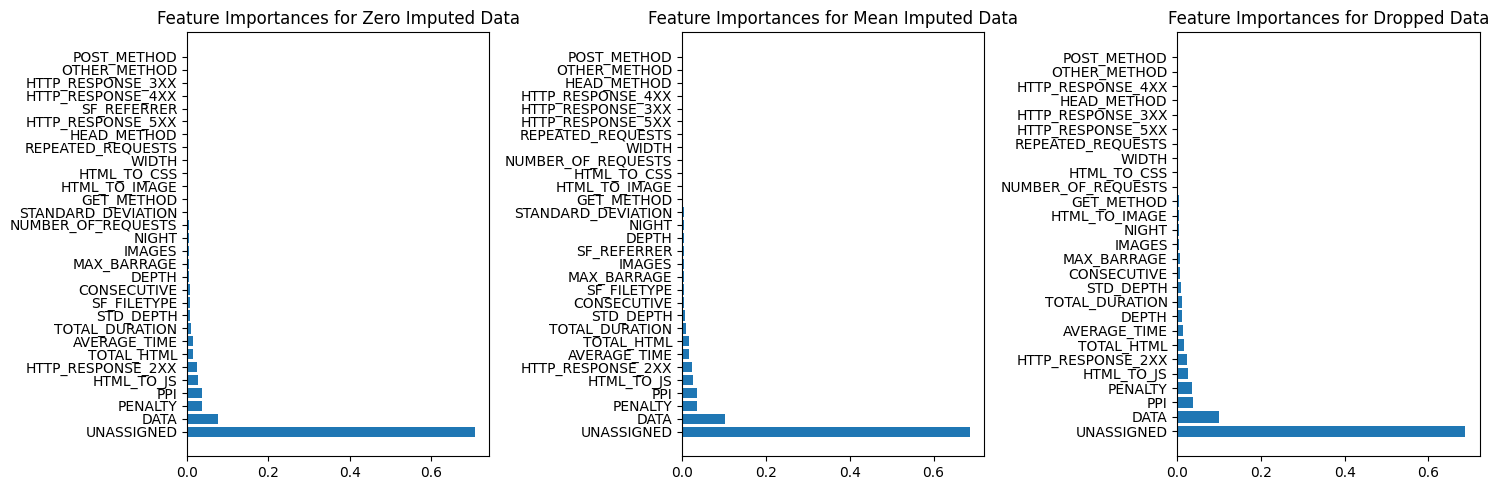

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].barh(df_importances_0['feature'], df_importances_0['importance'])
ax[0].set_title('Feature Importances for Zero Imputed Data')

ax[1].barh(df_importances_m['feature'], df_importances_m['importance'])
ax[1].set_title('Feature Importances for Mean Imputed Data')

ax[2].barh(df_importances_d['feature'], df_importances_d['importance'])
ax[2].set_title('Feature Importances for Dropped Data')

plt.tight_layout()
plt.show()

#### Duidelijk dat OTHER_METHOD, POST_METHOD, HEAD_METHOD, HTTP_RESPONSE(3,4,5)XX en REPEATED_REQUESTS geen importance hebben --> droppen

In [59]:
X_zero = X.copy()
X_zero = X_zero.fillna(0)
X_zero = X_zero.drop(['OTHER_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'HTTP_RESPONSE_3XX',  'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX','REPEATED_REQUESTS'], axis=1)

X_mean = X.copy()
X_mean = X_mean.fillna(0)
X_mean = X_mean.drop(['OTHER_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'HTTP_RESPONSE_3XX',  'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX','REPEATED_REQUESTS'], axis=1)

X_drop = X.copy()
X_drop = X.drop(['STANDARD_DEVIATION', 'SF_REFERRER', 'SF_FILETYPE', 'OTHER_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'HTTP_RESPONSE_3XX',  'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX','REPEATED_REQUESTS'], axis=1)

### Accuracy, confusion matrix en classification report vergelijken na het droppen

In [60]:
X_zero_train, X_zero_test, y_train, y_test = train_test_split(X_zero, y, test_size=0.2, random_state=42)

print(X_zero_train.shape, X_zero_test.shape, y_train.shape, y_test.shape)

(51187, 23) (12797, 23) (51187,) (12797,)


In [61]:
X_mean_train, X_mean_test, y_train, y_test = train_test_split(X_mean, y, test_size=0.2, random_state=42)

print(X_mean_train.shape, X_mean_test.shape, y_train.shape, y_test.shape)

(51187, 23) (12797, 23) (51187,) (12797,)


In [62]:
X_drop_train, X_drop_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=42)

print(X_drop_train.shape, X_drop_test.shape, y_train.shape, y_test.shape)

(51187, 20) (12797, 20) (51187,) (12797,)


### X zero

{'max_depth': 15}


0.9755411424552629


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10337
           1       0.93      0.94      0.94      2460

    accuracy                           0.98     12797
   macro avg       0.96      0.96      0.96     12797
weighted avg       0.98      0.98      0.98     12797





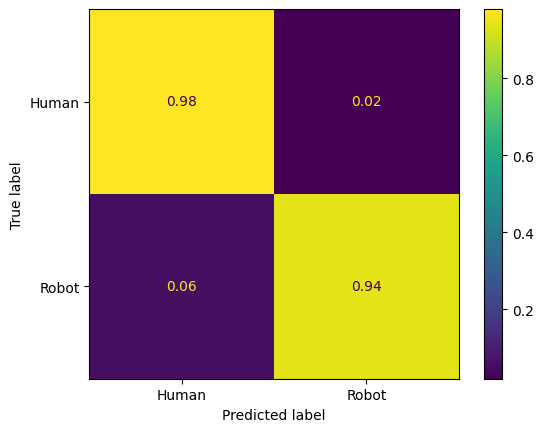

In [63]:
grid_search_zero = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)

grid_search_zero.fit(X_zero_train, y_train)

print(grid_search_zero.best_params_)
print("\n")

y_pred_0 = grid_search_zero.predict(X_zero_test)

print(accuracy_score(y_test, y_pred_0))
print("\n")

print(classification_report(y_test, y_pred_0))
print("\n")

cm_0 = np.round(confusion_matrix(y_test, y_pred_0, normalize='true'), 2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_0, display_labels=['Human', 'Robot'])
disp.plot()

### X mean

{'max_depth': 15}


0.9755411424552629


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10337
           1       0.93      0.94      0.94      2460

    accuracy                           0.98     12797
   macro avg       0.96      0.96      0.96     12797
weighted avg       0.98      0.98      0.98     12797





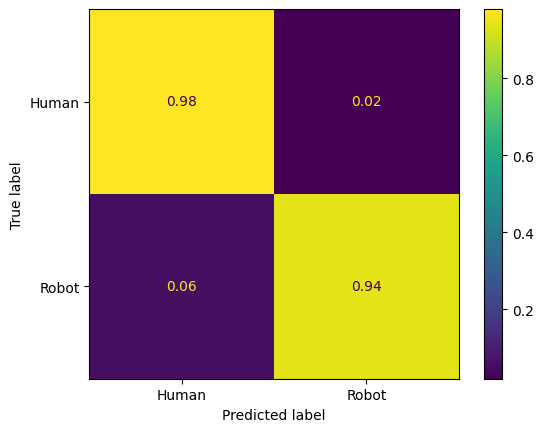

In [64]:
grid_search_mean = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)

grid_search_mean.fit(X_mean_train, y_train)

print(grid_search_mean.best_params_)
print("\n")

y_pred_mean = grid_search_mean.predict(X_mean_test)

print(accuracy_score(y_test, y_pred_mean))
print("\n")

print(classification_report(y_test, y_pred_mean))
print("\n")

cm_mean = np.round(confusion_matrix(y_test, y_pred_mean, normalize='true'), 2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean, display_labels=['Human', 'Robot'])
disp.plot()

### X drop

{'max_depth': 15}


0.9760881456591388


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10337
           1       0.94      0.94      0.94      2460

    accuracy                           0.98     12797
   macro avg       0.96      0.96      0.96     12797
weighted avg       0.98      0.98      0.98     12797





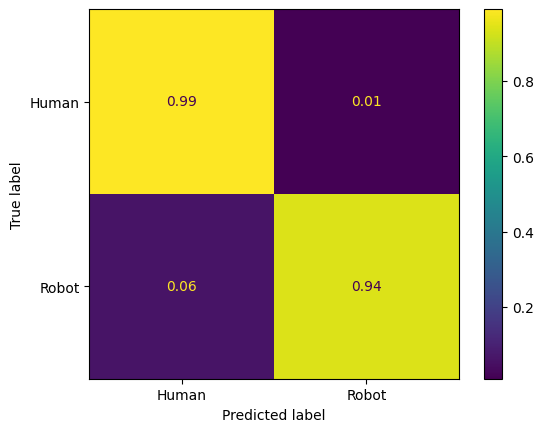

In [65]:
grid_search_drop = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': np.arange(2, 31)}, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)

grid_search_drop.fit(X_drop_train, y_train)

print(grid_search_drop.best_params_)
print("\n")

y_pred_drop = grid_search_drop.predict(X_drop_test)

print(accuracy_score(y_test, y_pred_drop))
print("\n")

print(classification_report(y_test, y_pred_drop))
print("\n")

cm_drop = np.round(confusion_matrix(y_test, y_pred_drop, normalize='true'), 2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_drop, display_labels=['Human', 'Robot'])
disp.plot()

# Conclusie
Aangezien de verschillen zeer minimaal zijn tussen de X_zero, X_mean en X_drop resultaten en de STD() te veel afwijkten bij de X_zero en X_mean ga ik de X_drop gebruiken. Ook bij de Feature importance kan er gezien worden dat STANDARD_DEVIATION, SF_REFERRER EN SF_FILETYPE nauwelijks impact (importance) hebben en dat bij de X_drop, na het droppen van de features zonder importance, de precision nog verbeterd

## DecisionTreeClassifier resultaten vergelijken met BaggingClassifier (Met en zonder OOB), met AdaBoostClassifier, GradientBoostClassifier en RandomForestClassifier

### Alle models trainen met en zonder scaling en resultaten vergelijken

De ranges van de waarden bij de features verschillen soms erg veel (De number of request bvb kan oplopen tot een nummer groter dan 9000 terwijl er bij de HTTP_REQUEST soms getallen van 0.3 zijn) --> testen of de models betere resultaten geven wanneer features gescaled zijn

In [35]:
df = pd.read_csv('../data/weblogs1.csv')

df = df.drop(['ID', 'STANDARD_DEVIATION', 'SF_REFERRER', 'SF_FILETYPE', 'OTHER_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'HTTP_RESPONSE_3XX',  'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX','REPEATED_REQUESTS'], axis=1)
X = df.drop(['ROBOT'], axis=1)
y = df['ROBOT']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(51187, 20) (12797, 20) (51187,) (12797,)


### Zonder scaling

##### DecisionTreeClassifier

{'max_depth': 29, 'min_samples_leaf': 3, 'min_samples_split': 12}


0.9766351488630147


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10337
           1       0.95      0.93      0.94      2460

    accuracy                           0.98     12797
   macro avg       0.97      0.96      0.96     12797
weighted avg       0.98      0.98      0.98     12797



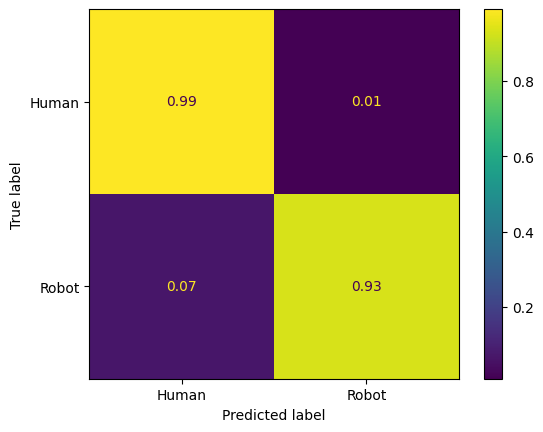

In [38]:
param_grid_dtc = {'max_depth': np.arange(2, 40), 'min_samples_split': np.arange(2, 20, 2), 'min_samples_leaf': np.arange(1, 12, 2)}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid_dtc, cv=5, scoring='precision', return_train_score=True, n_jobs=-1)

grid_search_dtc.fit(X_train, y_train)

print(grid_search_dtc.best_params_)
print("\n")

dt_clf = grid_search_dtc.best_estimator_

dt_clf.fit(X_train, y_train)

y_pred_dtc = dt_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_dtc))
print("\n")
print(classification_report(y_test, y_pred_dtc))

cm = np.round(confusion_matrix(y_test, y_pred_dtc, normalize='true'), 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

##### BaggingClassifier zonder OOB

- n_estimators = 500 --> 500 decision trees getrained op subset vd data
- max_samples = 100 --> elke tree zal op 100 samples v/e random subset worden getrained
- bootstrap = True --> training data samples zullen replaced worden

0.9530358677815113


              precision    recall  f1-score   support

           0       0.98      0.96      0.97     10337
           1       0.84      0.93      0.88      2460

    accuracy                           0.95     12797
   macro avg       0.91      0.94      0.93     12797
weighted avg       0.96      0.95      0.95     12797



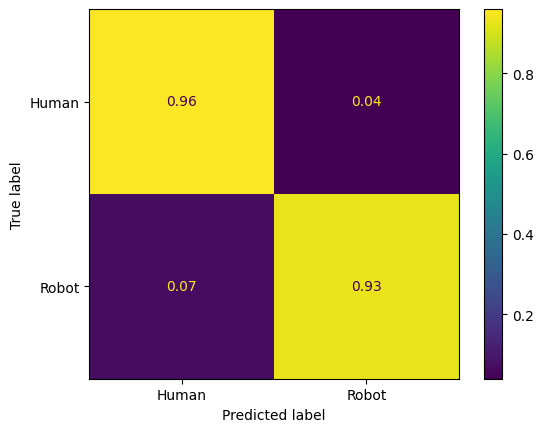

In [69]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

y_pred_bc = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_bc))
print("\n")
print(classification_report(y_test, y_pred_bc))

cm = np.round(confusion_matrix(y_test, y_pred_bc, normalize='true'), 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

##### BaggingClassifier met OOB

- oob_score = True --> niet gebruikte data samples voor evaluatie BaggingClassifier

In [70]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

bag_clf.oob_score_

0.9522144294449763

In [71]:
y_pred_oob = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred_oob)

0.9530358677815113

Is zeer dicht bij de OOB score

In [72]:
print(classification_report(y_test, y_pred_oob))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     10337
           1       0.84      0.93      0.88      2460

    accuracy                           0.95     12797
   macro avg       0.91      0.94      0.93     12797
weighted avg       0.96      0.95      0.95     12797



##### AdaBoostClassifier

0.9764007189184966

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10337
           1       0.94      0.93      0.94      2460

    accuracy                           0.98     12797
   macro avg       0.96      0.96      0.96     12797
weighted avg       0.98      0.98      0.98     12797



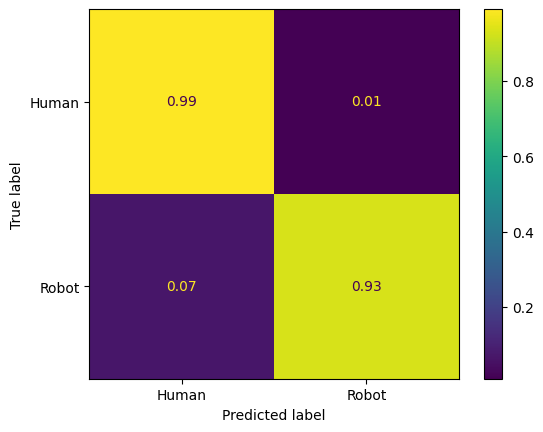

In [75]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)
print(f"{accuracy_score(y_test, y_pred_ada)}\n")

print(classification_report(y_test, y_pred_ada))

cm = np.round(confusion_matrix(y_test, y_pred_ada, normalize='true'), 2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

##### GradientBoostClassifier

best_n_estimators --> list van MSE's --> kiezen index met laagste (minimum) MSE en + 1 omdat index op 0 start

0.9767132921778542

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10337
           1       0.94      0.93      0.94      2460

    accuracy                           0.98     12797
   macro avg       0.96      0.96      0.96     12797
weighted avg       0.98      0.98      0.98     12797



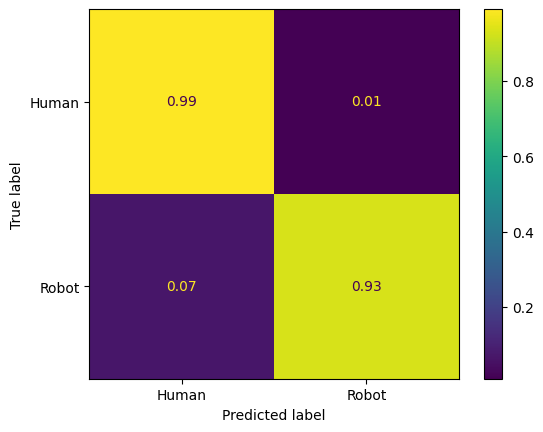

In [39]:
gbrt = GradientBoostingClassifier(max_depth=29, n_estimators=120, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)

errors_gbrt = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]

best_n_estimators = np.argmin(errors_gbrt) + 1

gbrt_best = GradientBoostingClassifier(max_depth=29, n_estimators=best_n_estimators, learning_rate=0.1, random_state=42)
gbrt_best.fit(X_train, y_train)

y_pred_gbrt = gbrt_best.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_gbrt)}\n")

print(classification_report(y_test, y_pred_gbrt))

cm = np.round(confusion_matrix(y_test, y_pred_gbrt, normalize='true'), 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

##### RandomForestClassifier

207 minuten om te trainen

{'bootstrap': False, 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 140}
0.9801515980307884

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10337
           1       0.95      0.95      0.95      2460

    accuracy                           0.98     12797
   macro avg       0.97      0.97      0.97     12797
weighted avg       0.98      0.98      0.98     12797



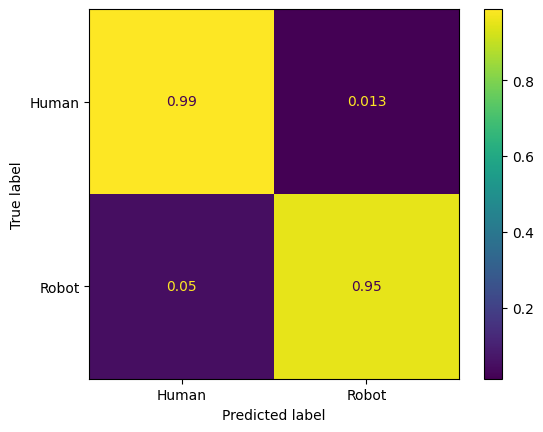

In [79]:
param_grid = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_leaf' : [1, 2, 4],
    'min_samples_split' : [2, 5, 10],
    'bootstrap' : [True, False],
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)

grid_search_rfc.fit(X_train, y_train)

print(grid_search_rfc.best_params_)

rf_clf = grid_search_rfc.best_estimator_
rf_clf.fit(X_train, y_train)

y_pred_rfc = rf_clf.predict(X_test)
print(f"{accuracy_score(y_test, y_pred_rfc)}\n")

print(classification_report(y_test, y_pred_rfc))

cm = confusion_matrix(y_test, y_pred_rfc, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

In [82]:
np.round(confusion_matrix(y_test, y_pred_rfc, normalize='true'), 2)

array([[0.99, 0.01],
       [0.05, 0.95]])

### Met Scaling

In [80]:
df = pd.read_csv('../data/weblogs1.csv')

X = df.drop(['ROBOT', 'ID', 'STANDARD_DEVIATION', 'SF_REFERRER', 'SF_FILETYPE', 'OTHER_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'HTTP_RESPONSE_3XX',  'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX','REPEATED_REQUESTS'], axis=1)
y = df['ROBOT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0.9739782761584747

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10337
           1       0.93      0.94      0.93      2460

    accuracy                           0.97     12797
   macro avg       0.96      0.96      0.96     12797
weighted avg       0.97      0.97      0.97     12797



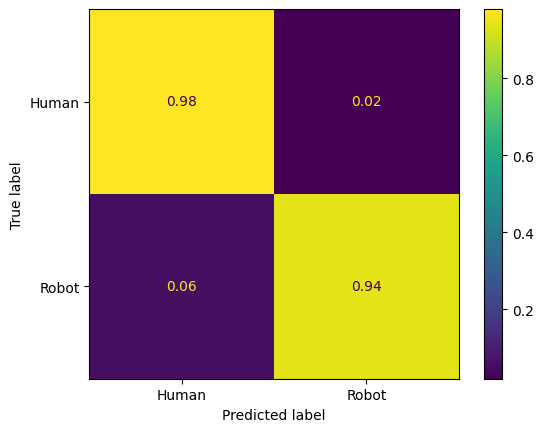

In [81]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

dt_clf_scaled = DecisionTreeClassifier(random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('gs_dt_clf_scaled', GridSearchCV(dt_clf_scaled, param_grid=param_grid_dtc, cv=5, n_jobs=-1)),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = np.round(confusion_matrix(y_test, y_pred_pipeline, normalize='true'), 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

0.9520200046885989

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10337
           1       0.83      0.94      0.88      2460

    accuracy                           0.95     12797
   macro avg       0.91      0.95      0.93     12797
weighted avg       0.96      0.95      0.95     12797



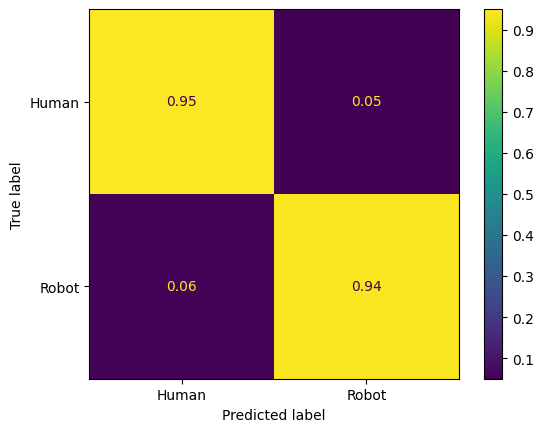

In [83]:
bag_clf_scaled = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('bag_clf_scaled', bag_clf_scaled),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = np.round(confusion_matrix(y_test, y_pred_pipeline, normalize='true'), 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

0.9520200046885989

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10337
           1       0.83      0.94      0.88      2460

    accuracy                           0.95     12797
   macro avg       0.91      0.95      0.93     12797
weighted avg       0.96      0.95      0.95     12797



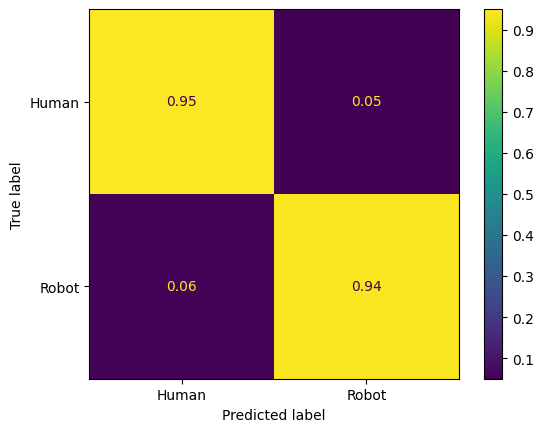

In [84]:
bag_clf_oob_scaled = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('bag_clf_oob_scaled', bag_clf_oob_scaled),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = np.round(confusion_matrix(y_test, y_pred_pipeline, normalize='true'), 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

0.9730405563804017

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10337
           1       0.93      0.93      0.93      2460

    accuracy                           0.97     12797
   macro avg       0.96      0.95      0.96     12797
weighted avg       0.97      0.97      0.97     12797



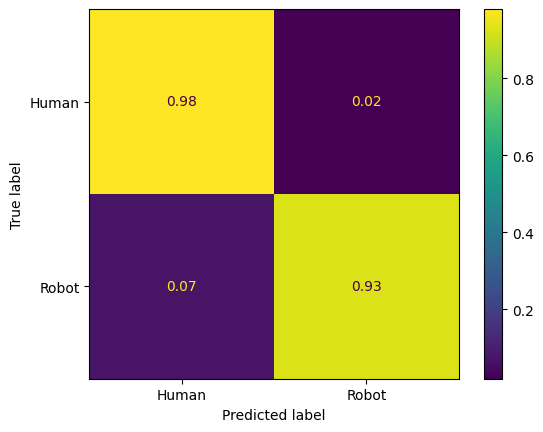

In [86]:
ada_clf_scaled = AdaBoostClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('ada_clf_scaled', ada_clf_scaled),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = np.round(confusion_matrix(y_test, y_pred_pipeline, normalize='true'), 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

0.9744471360475111

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10337
           1       0.94      0.93      0.93      2460

    accuracy                           0.97     12797
   macro avg       0.96      0.96      0.96     12797
weighted avg       0.97      0.97      0.97     12797



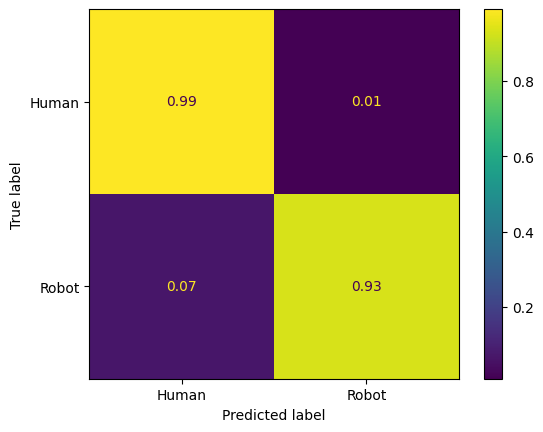

In [87]:
gbrt_best_scaled = GradientBoostingClassifier(max_depth=18, n_estimators=best_n_estimators, learning_rate=0.1, random_state=42)

pipeline = Pipeline([
    ('scaler', scaler),
    ('gbrt_best_scaled', gbrt_best_scaled),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = np.round(confusion_matrix(y_test, y_pred_pipeline, normalize='true'), 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

0.9739782761584747

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10337
           1       0.92      0.95      0.93      2460

    accuracy                           0.97     12797
   macro avg       0.95      0.96      0.96     12797
weighted avg       0.97      0.97      0.97     12797



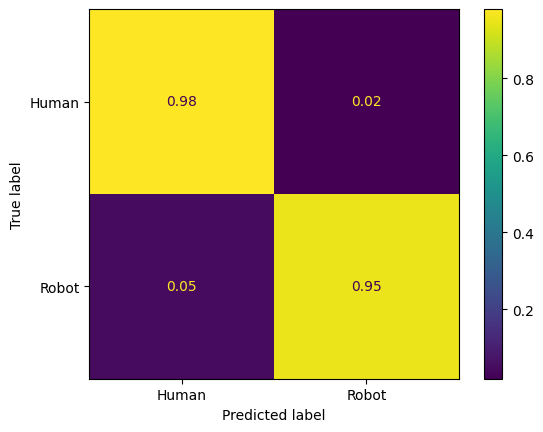

In [89]:
rf_clf_scaled = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=140, max_depth=25, bootstrap=False, min_samples_leaf=2, min_samples_split=2)

pipeline = Pipeline([
    ('scaler', scaler),
    ('rf_clf_scaled', rf_clf_scaled),
])

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

print(f"{accuracy_score(y_test, y_pred_pipeline)}\n")

print(classification_report(y_test, y_pred_pipeline))

cm = np.round(confusion_matrix(y_test, y_pred_pipeline, normalize='true'), 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'Robot'])
disp.plot()

Conclusie --> scaling heeft de resultaten slechter gemaakt

### Models opslaan

In [ ]:
filename = '../main_models/decision_tree_classifier2.sav'
pickle.dump(dt_clf, open(filename, 'wb'))

filename2 = '../main_models/bagging_classifier_oob2.sav'
pickle.dump(bag_clf, open(filename2, 'wb'))

filename3 = '../main_models/adaboost_classifier2.sav'
pickle.dump(ada_clf, open(filename3, 'wb'))

filename4 = '../main_models/gradient_boosting_classifier2.sav'
pickle.dump(gbrt_best, open(filename4, 'wb'))

filename5 = '../main_models/random_forest_classifier2.sav'
pickle.dump(rf_clf, open(filename5, 'wb'))